## Download all the necessary libraries we will need for today session

### 1) We will try out using pipenv install and then pipenv shell, if dependancy is still an issue we will go to Google Colab
### 2) Download the libraries we will need for today's session
### 3) Load in our API credentials

In [1]:
# We will be running the following code in our terminal/ cell depending on what is chosen.

# Our own local machine:
# %pipenv install langchain langchain_core langchain_openai langchain-community langchain_text_splitters openai pypdf python-dotenv numpy scikit-learn matplotlib scikit-learn scipy beautifulsoup4 pypdf chroma langgraph typing typing_extensions 

# Google Colab:
# %pip install langchain langchain_core langchain_openai langchain-community langchain_text_splitters openai pypdf python-dotenv numpy scikit-learn matplotlib scikit-learn scipy beautifulsoup4 pypdf chroma langgraph typing typing_extensions

In [2]:
# Load the libraries needed
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

In [3]:
load_dotenv("test.env")

True

In [4]:
# If LangSmith isn't tracking try to restart the entire kernel at the top
trace = os.getenv("LANGCHAIN_TRACING_V2")
langsmith = os.getenv("LANGCHAIN_API_KEY")

In [5]:
# Create a model using GPT-4
gpt = ChatOpenAI(
    model='gpt-4o',
    openai_api_key = os.getenv("OPENAI_API_KEY"),
    temperature=0.7
)

In [6]:
# Let's test it out
results = gpt.invoke("Tell me something about singapore that most singaporeans wouldn't know about.")
print(results.content)

One interesting fact about Singapore that many Singaporeans might not know is that the country is home to a "supertree" that generates solar power and collects rainwater. The Supertree Grove at Gardens by the Bay is a collection of vertical gardens ranging from 25 to 50 meters in height. These supertrees are not just visually striking; they are also an integral part of the park's environmental sustainability efforts. They are equipped with photovoltaic cells that harness solar energy, which is used to illuminate the trees themselves. Additionally, the trees collect rainwater, which is used in the park's irrigation system and fountain displays. This innovative design contributes to Singapore's reputation as a city at the forefront of green technology and urban sustainability.


In [7]:
# Normal Embeddings models
from langchain_openai import OpenAIEmbeddings

embeddings1 = OpenAIEmbeddings(
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    model="text-embedding-3-large"
)

In [8]:
# Embeddings models
from langchain_openai import OpenAIEmbeddings

embeddings2 = OpenAIEmbeddings(
    model="text-embedding-3-large",
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    dimensions = 1024
)

# Embeddings

In [9]:
text = "Data Analytics Club is dope and fun, in today's session we will be covering topics on GenAI, specifically RAG systems"

# Embed the text above using the embed_query function
single_vector = embeddings1.embed_query(text)

# Represent the semantic meaning of the text, or in other words the vector and position in a given vector space.
print(single_vector)

# Dimensionality
print(len(single_vector))

[-0.046528253704309464, 0.003575214883312583, -0.02158958837389946, 0.009516462683677673, 0.0065598557703197, -0.01111624576151371, -0.0313078910112381, 0.02034863457083702, 0.038903120905160904, 0.03881341218948364, 0.020079512149095535, -0.03965068235993385, 0.04279044270515442, -0.021260660141706467, -0.034148626029491425, 0.0022968838457018137, -0.0309490617364645, -0.005546909291297197, -0.0046946885995566845, -0.07684936374425888, 0.01074246410280466, -0.016805190593004227, -0.003057528054341674, 0.040577661246061325, -0.01608753204345703, -0.01455503050237894, -0.01867409609258175, 0.027495326474308968, -0.04213258996605873, 0.016625776886940002, 0.005460939835757017, -0.003743416164070368, 0.03932175412774086, -0.007879302836954594, -0.046916984021663666, 0.010787318460643291, 0.023563150316476822, 0.04365761578083038, -0.01846477948129177, 0.012760881334543228, 0.015070848166942596, 0.0076998877339065075, -0.029379183426499367, 0.026015153154730797, -0.0029248360078781843, -0.

In [10]:
# Reduced dimensionality, incase your computer cannot handle the computation required
# Improves model performance and reduces overfitting
# For visualisation and human interpretations

single_vector2 = embeddings2.embed_query(text)
print(single_vector2)

print(len(single_vector2))

[-0.06396519392728806, 0.0055319033563137054, -0.029523974284529686, 0.013030705973505974, 0.008569328114390373, -0.014833697117865086, -0.042984940111637115, 0.02770049497485161, 0.05339311435818672, 0.052655525505542755, 0.02692192979156971, -0.0543355867266655, 0.058843061327934265, -0.028663454577326775, -0.046508967876434326, 0.0025316141545772552, -0.04228832945227623, -0.007498802617192268, -0.006095338147133589, -0.10604863613843918, 0.015182001516222954, -0.023090574890375137, -0.003931236919015646, 0.05597466602921486, -0.022189078852534294, -0.01967923529446125, -0.025938481092453003, 0.03745303675532341, -0.05822840705513954, 0.02266031503677368, 0.0073809935711324215, -0.004699557088315487, 0.053679950535297394, -0.010797455906867981, -0.06417007744312286, 0.014270261861383915, 0.03286360576748848, 0.059375762939453125, -0.02559017576277256, 0.017302565276622772, 0.020529508590698242, 0.010654035955667496, -0.04040338471531868, 0.03610079362988472, -0.0036930576898157597, 

# Embeddings on a larger text/documents

In [11]:
# List of products in a shop

products = [
    {
        'title': 'Smartphone X1',
        'short_description': 'The latest flagship smartphone with AI-powered features and 5G connectivity.',
        'price': 799.99,
        'category': 'Electronics',
        'features': [
            '6.5-inch AMOLED display',
            'Quad-camera system with 48MP main sensor',
            'Face recognition and fingerprint sensor',
            'Fast wireless charging'
        ]
    },
    {
        'title': 'Luxury Diamond Necklace',
        'short_description': 'Elegant necklace featuring genuine diamonds, perfect for special occasions.',
        'price': 1499.99,
        'category': 'Beauty',
        'features': [
            '18k white gold chain',
            '0.5 carat diamond pendant',
            'Adjustable chain length',
            'Gift box included'
        ]
    },
    {
        'title': 'RC Racing Car',
        'short_description': 'High-speed remote-controlled racing car for adrenaline-packed fun.',
        'price': 89.99,
        'category': 'Toys',
        'features': [
            'Top speed of 30 mph',
            'Responsive remote control',
            'Rechargeable battery',
            'Durable construction'
        ]
    },
    {
        'title': 'Ultra HD 4K TV',
        'short_description': 'Immerse yourself in stunning visuals with this 65-inch 4K TV.',
        'price': 1299.99,
        'category': 'Electronics',
        'features': [
            '65-inch 4K UHD display',
            'Dolby Vision and HDR10+ support',
            'Smart TV with streaming apps',
            'Voice remote included'
        ]
    },
    {
        'title': 'Glowing Skin Serum',
        'short_description': 'Revitalize your skin with this nourishing serum for a radiant glow.',
        'price': 39.99,
        'category': 'Beauty',
        'features': [
            'Hyaluronic acid and vitamin C',
            'Hydrates and reduces fine lines',
            'Suitable for all skin types',
            'Cruelty-free'
        ]
    },
    {
        'title': 'LEGO Space Shuttle',
        'short_description': 'Build your own space adventure with this LEGO space shuttle set.',
        'price': 49.99,
        'category': 'Toys',
        'features': [
            '359 pieces for creative building',
            'Astronaut minifigure included',
            'Compatible with other LEGO sets',
            'For ages 7+'
        ]
    },
    {
        'title': 'Wireless Noise-Canceling Headphones',
        'short_description': 'Enjoy immersive audio and block out distractions with these headphones.',
        'price': 199.99,
        'category': 'Electronics',
        'features': [
            'Active noise cancellation',
            'Bluetooth 5.0 connectivity',
            'Long-lasting battery life',
            'Foldable design for portability'
        ]
    },
    {
        'title': 'Luxury Perfume Gift Set',
        'short_description': 'Indulge in a collection of premium fragrances with this gift set.',
        'price': 129.99,
        'category': 'Beauty',
        'features': [
            'Five unique scents',
            'Elegant packaging',
            'Perfect gift for fragrance enthusiasts',
            'Variety of fragrance notes'
        ]
    },
    {
        'title': 'Remote-Controlled Drone',
        'short_description': 'Take to the skies and capture stunning aerial footage with this drone.',
        'price': 299.99,
        'category': 'Electronics',
        'features': [
            '4K camera with gimbal stabilization',
            'GPS-assisted flight',
            'Remote control with smartphone app',
            'Return-to-home function'
        ]
    },
    {
        'title': 'Luxurious Spa Gift Basket',
        'short_description': 'Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.',
        'price': 79.99,
        'category': 'Beauty',
        'features': [
            'Bath bombs, body lotion, and more',
            'Aromatherapy candles',
            'Reusable wicker basket',
            'Great for self-care'
        ]
    },
    {
        'title': 'Robot Building Kit',
        'short_description': 'Learn robotics and coding with this educational robot building kit.',
        'price': 59.99,
        'category': 'Toys',
        'features': [
            'Build and program your own robot',
            'STEM learning tool',
            'Compatible with Scratch and Python',
            'Ideal for young inventors'
        ]
    },
    {
        'title': 'High-Performance Gaming Laptop',
        'short_description': 'Dominate the gaming world with this powerful gaming laptop.',
        'price': 1499.99,
        'category': 'Electronics',
        'features': [
            'Intel Core i7 processor',
            'NVIDIA RTX graphics',
            '144Hz refresh rate display',
            'RGB backlit keyboard'
        ]
    },
    {
        'title': 'Natural Mineral Makeup Set',
        'short_description': 'Enhance your beauty with this mineral makeup set for a flawless look.',
        'price': 34.99,
        'category': 'Beauty',
        'features': [
            'Mineral foundation and eyeshadows',
            'Non-comedogenic and paraben-free',
            'Cruelty-free and vegan',
            'Includes makeup brushes'
        ]
    },
    {
        'title': 'Interactive Robot Pet',
        'short_description': 'Adopt your own robot pet that responds to your voice and touch.',
        'price': 79.99,
        'category': 'Toys',
        'features': [
            'Realistic pet behaviors',
            'Voice recognition and touch sensors',
            'Teaches responsibility and empathy',
            'Rechargeable battery'
        ]
    },
    {
        'title': 'Smart Thermostat',
        'short_description': "Control your home's temperature and save energy with this smart thermostat.",
        'price': 129.99,
        'category': 'Electronics',
        'features': [
            'Wi-Fi connectivity',
            'Energy-saving features',
            'Compatible with voice assistants',
            'Easy installation'
        ]
    },
    {
        'title': 'Designer Makeup Brush Set',
        'short_description': 'Upgrade your makeup routine with this premium designer brush set.',
        'price': 59.99,
        'category': 'Beauty',
        'features': [
            'High-quality synthetic bristles',
            'Chic designer brush handles',
            'Complete set for all makeup needs',
            'Includes stylish carrying case'
        ]
    },
    {
        'title': 'Remote-Controlled Dinosaur Toy',
        'short_description': 'Roar into action with this remote-controlled dinosaur toy with lifelike movements.',
        'price': 49.99,
        'category': 'Toys',
        'features': [
            'Realistic dinosaur sound effects',
            'Walks and roars like a real dinosaur',
            'Remote control included',
            'Educational and entertaining'
        ]
    },
    {
        'title': 'Wireless Charging Dock',
        'short_description': 'Charge your devices conveniently with this sleek wireless charging dock.',
        'price': 39.99,
        'category': 'Electronics',
        'features': [
            'Qi wireless charging technology',
            'Supports multiple devices',
            'LED charging indicators',
            'Compact and stylish design'
        ]
    },
    {
        'title': 'Luxury Skincare Set',
        'short_description': 'Elevate your skincare routine with this luxurious skincare set.',
        'price': 179.99,
        'category': 'Beauty',
        'features': [
            'Premium anti-aging ingredients',
            'Hydrating and rejuvenating formulas',
            'Complete skincare regimen',
            'Elegant packaging'
        ]
    }
]

In [12]:
# Type of keys we have
print(products[0].keys())

# Number of products being sold in our outlet
print(len(products))

dict_keys(['title', 'short_description', 'price', 'category', 'features'])
19


In [13]:
# We want to embed the short descriptions from products
# Extract a list of product short descriptions from products
product_descriptions = [product['short_description'] for product in products]

print(product_descriptions)

['The latest flagship smartphone with AI-powered features and 5G connectivity.', 'Elegant necklace featuring genuine diamonds, perfect for special occasions.', 'High-speed remote-controlled racing car for adrenaline-packed fun.', 'Immerse yourself in stunning visuals with this 65-inch 4K TV.', 'Revitalize your skin with this nourishing serum for a radiant glow.', 'Build your own space adventure with this LEGO space shuttle set.', 'Enjoy immersive audio and block out distractions with these headphones.', 'Indulge in a collection of premium fragrances with this gift set.', 'Take to the skies and capture stunning aerial footage with this drone.', 'Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.', 'Learn robotics and coding with this educational robot building kit.', 'Dominate the gaming world with this powerful gaming laptop.', 'Enhance your beauty with this mineral makeup set for a flawless look.', 'Adopt your own robot pet that responds to your voice

In [14]:
# Create embeddings for each product description, nested list
response = embeddings1.embed_documents('product_decriptions')
response2 = embeddings1.embed_query('product_decriptions')

# We will use embed_documents here 
print(response)
print(len(response))

# The whole thing will be embedded as a whole
print(response2)
print(len(response2))

[[-0.01792002283036709, 0.013713856227695942, 0.001684657414443791, 0.05131523311138153, 0.0011873658513650298, 0.0024426437448710203, 0.012373141013085842, 0.04886163771152496, -0.03971322625875473, 0.05187605693936348, -0.00955150369554758, -0.005971880629658699, -0.02458854950964451, -0.004164543468505144, -0.05320800840854645, -0.0003743378911167383, -0.029863784089684486, 0.005687088239938021, -0.004118538461625576, 4.025433008791879e-05, 0.04118538275361061, -0.012741180136799812, -0.015738073736429214, 0.011163868010044098, -0.004440573044121265, 0.04209671914577484, 0.044760625809431076, 0.013179322704672813, -0.004565443377941847, -0.0262009147554636, -0.014546327292919159, 0.010848404839634895, 0.0076105329208076, -0.0007842748309485614, -0.048125557601451874, 0.025482360273599625, 0.019260738044977188, 0.010313871316611767, -0.005003585945814848, -0.03422768414020538, -0.007711305748671293, -0.010883457027375698, -0.0688759833574295, 0.015834465622901917, 0.01384529937058687

In [15]:
# Extract the embeddings from response_dict and store in products
for i, product in enumerate(products):
    product['embeddings'] = response[i]
    
print(products[0])
print(products[0].keys())

{'title': 'Smartphone X1', 'short_description': 'The latest flagship smartphone with AI-powered features and 5G connectivity.', 'price': 799.99, 'category': 'Electronics', 'features': ['6.5-inch AMOLED display', 'Quad-camera system with 48MP main sensor', 'Face recognition and fingerprint sensor', 'Fast wireless charging'], 'embeddings': [-0.01792002283036709, 0.013713856227695942, 0.001684657414443791, 0.05131523311138153, 0.0011873658513650298, 0.0024426437448710203, 0.012373141013085842, 0.04886163771152496, -0.03971322625875473, 0.05187605693936348, -0.00955150369554758, -0.005971880629658699, -0.02458854950964451, -0.004164543468505144, -0.05320800840854645, -0.0003743378911167383, -0.029863784089684486, 0.005687088239938021, -0.004118538461625576, 4.025433008791879e-05, 0.04118538275361061, -0.012741180136799812, -0.015738073736429214, 0.011163868010044098, -0.004440573044121265, 0.04209671914577484, 0.044760625809431076, 0.013179322704672813, -0.004565443377941847, -0.0262009147

## Dimensionality Reduction

#### 1) Understanding how the vectors work in a way that humans can understand

    a) There are two ways of performing a dimensionality reduction task. Linear and Non-linear reduction methods.
    b) We will be using PCA and TSNE for our visualisation purposes

##### 2) Let's go back to the slides to understand abit more about dimensionality reduction and the techniques to accomplish them

### t-distributed Stochastic Neighbor Embedding (TSNE)

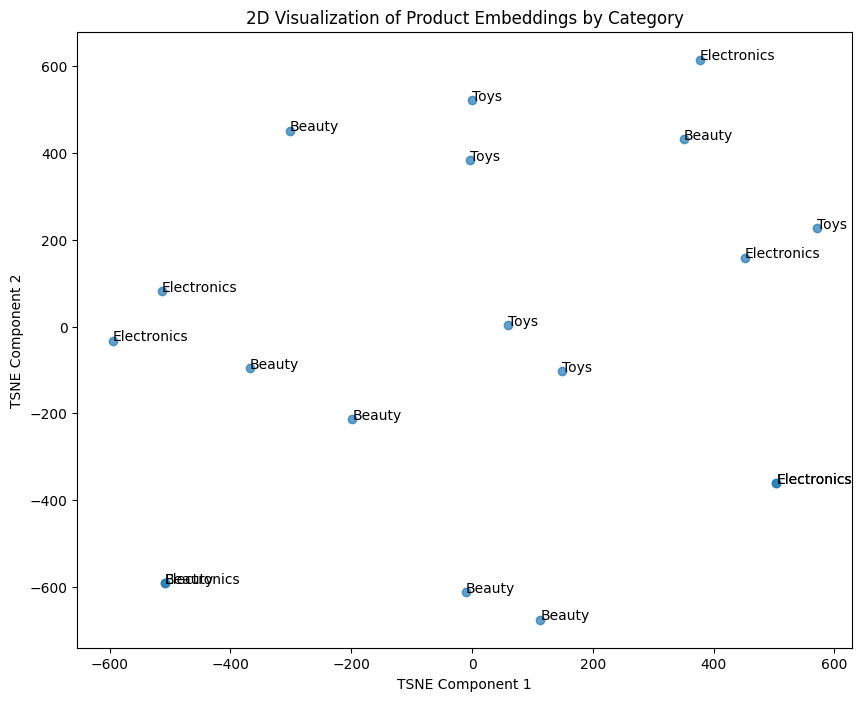

In [16]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create reviews and embeddings lists using list comprehensions
categories = [product['category'] for product in products]
embeddings = [product['embeddings'] for product in products]

# Reduce the number of embeddings dimensions to two using t-SNE
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

# Create a scatter plot of the 2D embeddings
plt.figure(figsize=(10, 8))

# Create a scatter plot from embeddings_2d
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], alpha=0.7)

for i, category in enumerate(categories):
    plt.annotate(category, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("2D Visualization of Product Embeddings by Category")
plt.show()

### Principal Component Analysis (PCA)

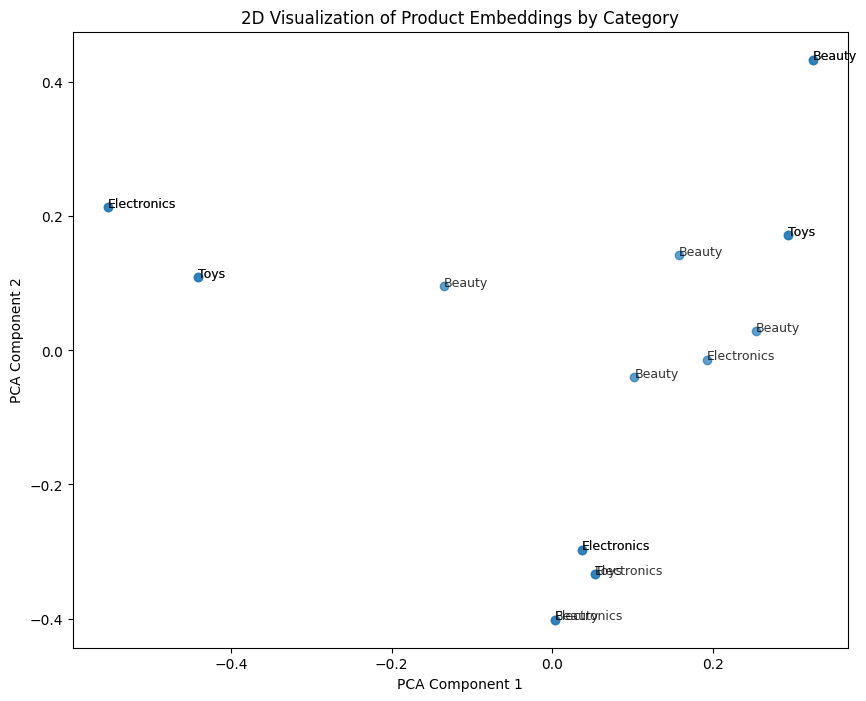

In [17]:
# Extract categories and embeddings from products
categories = [product['category'] for product in products]
embeddings = [product['embeddings'] for product in products]  # Assuming 'embedding' contains vector data

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Create a scatter plot of the 2D embeddings
plt.figure(figsize=(10, 8))

# Numpy way of finding every row and column to pick from.
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)

# Annotate each point with its category
for i, category in enumerate(categories):
    plt.annotate(category, (pca_result[i, 0], pca_result[i, 1]), fontsize=9, alpha=0.8)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Product Embeddings by Category")
plt.show()

## Similarity Search
    We embedded the text/documents and received our vectors. 
    Now what how can our machine find the information we are looking for?
    Using similarity search!
### There are three ways to go about finding similar information/vectors
    1) Euclidean Distance
    2) Cosine Similarity
    3) Inner Product

In [18]:
# A more mathematical approach of finding the cosine distance of each vector
from scipy.spatial import distance

# Embed the search text
search_text = "soap"
search_embedding = embeddings1.embed_query(search_text)

distances = []
for product in products:
  # Compute the cosine distance for each product description
  dist = distance.cosine(search_embedding, product["embeddings"])
  distances.append(dist)

# Find the index of the minimum value in an array
min_dist_ind = np.argmin(distances)
print(min_dist_ind)

for key, value in products[min_dist_ind].items():
    print(key, value)

# Find and print the most similar product short_description    
print(products[min_dist_ind]['short_description'])

18
title Luxury Skincare Set
short_description Elevate your skincare routine with this luxurious skincare set.
price 179.99
category Beauty
features ['Premium anti-aging ingredients', 'Hydrating and rejuvenating formulas', 'Complete skincare regimen', 'Elegant packaging']
embeddings [0.0010189817985519767, -0.013820724561810493, -0.0011867200955748558, 0.030544348061084747, 0.014414084143936634, 0.011100396513938904, 0.04242980480194092, 0.032698702067136765, -0.0064311097376048565, 0.0617094449698925, -0.020740214735269547, 0.022255565971136093, -0.03131115064024925, 0.014350184239447117, -0.011912844143807888, -0.0009613573784008622, -0.026819873601198196, 0.006380902603268623, -0.008621977642178535, -0.026509501039981842, 0.029960116371512413, -0.029996631667017937, -0.007613265421241522, 0.04337918385863304, 0.0064995745196938515, 0.004598540253937244, 0.04600822553038597, 0.0013110974105075002, -0.025651410222053528, 0.0049157594330608845, -0.013702052645385265, 0.0312381237745285

## VectorStore and Retrievers

In [19]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Dogs are great companions, known for their loyalty and friendliness.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Cats are independent pets that often enjoy their own space.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Goldfish are popular pets for beginners, requiring relatively simple care.",
        metadata={"source": "fish-pets-doc"},
    ),
    Document(
        page_content="Parrots are intelligent birds capable of mimicking human speech.",
        metadata={"source": "bird-pets-doc"},
    ),
    Document(
        page_content="Rabbits are social animals that need plenty of space to hop around.",
        metadata={"source": "mammal-pets-doc"},
    ),
]

In [20]:
# Standardising from now onwards we will only use embedding model
embedding = OpenAIEmbeddings(
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    model="text-embedding-3-large"
)

In [21]:
from langchain_chroma import Chroma

vectorstore = Chroma.from_documents(
    documents,
    embedding=embedding,
)

In [22]:
# We will use similarity_search when we have a certain text we are looking for
print(vectorstore.similarity_search("cat"))

# We can also indicate how many similar results we want to get back
print(vectorstore.similarity_search("cat", k=1))

[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.')]
[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.')]


In [23]:
# We will use similarity_search when we have a certain text we are looking for
# We can also indicate how many similar results we want to get back

# Euclidean, data between 0 to 2
print(vectorstore.similarity_search_with_score("cat"))
print(vectorstore.similarity_search_with_score("cat", k=1))

# Cosine, data between 0 to 1
print(vectorstore.similarity_search_with_relevance_scores("cat"))
print(vectorstore.similarity_search_with_relevance_scores("cat", k=1))

[(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), 1.3622384071350098), (Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), 1.6549866199493408), (Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), 1.6727550029754639), (Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.'), 1.6872245073318481)]
[(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), 1.3622384071350098)]


/var/folders/wn/svgxh61s6j5cv2x82pxnjm640000gn/T/ipykernel_237/1915743011.py:9: UserWarning: Relevance scores must be between 0 and 1, got [(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), 0.03674819150570774), (Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), -0.17019688078023898), (Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), -0.18274787509199508), (Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.'), -0.192926423301073)]
  print(vectorstore.similarity_search_with_relevance_scores("cat"))


[(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), 0.03674819150570774), (Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), -0.17019688078023898), (Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), -0.18274787509199508), (Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.'), -0.192926423301073)]
[(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), 0.03675198472207364)]


In [24]:
# Other search methods
text_embed = embedding.embed_query("cat")
print(vectorstore.similarity_search_by_vector(text_embed))

[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.')]


### Retrievers
    Above we created a retriever object if we want to incorporate the LCEL we need to make it into a runnable

In [25]:
from langchain_core.documents import Document
from langchain_core.runnables import RunnableLambda
from langchain_core.output_parsers import StrOutputParser

In [26]:
retriever = RunnableLambda(vectorstore.similarity_search).bind(k=1)
chain = retriever | StrOutputParser()

print(retriever.batch(["cat", "shark"]))
print(retriever.invoke("cat"))

[[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.')], [Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.')]]
[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.')]


In [27]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

system_message = """
Answer this question using the provided context only.

Context:
{context}
"""

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_message),
        ("human", "{question}"),
    ]
)

rag_chain = {"context": retriever, "question": RunnablePassthrough()} | prompt | gpt

In [28]:
response = rag_chain.invoke("tell me about cats")

print(response.content)

Cats are independent pets that often enjoy their own space.


## Retrieval Augmented Generation (RAG) Systems
    Retrieval Augmented Generation (RAG) systems combine retrieval-based and generative approaches to enhance AI responses. In a RAG system, the model first retrieves relevant information (documents or text) from a large dataset based on the query. It then generates answers using this retrieved context, ensuring responses are accurate and contextually grounded. This method improves upon traditional generative models by allowing the AI to access up-to-date knowledge and provide more factual and relevant answers, making it ideal for applications like chatbots, search engines, and question-answering systems.

### Let's take a look at a full rag process

[Link to the Nike download document](https://drive.google.com/file/d/1sGGBRseXw3lTecdeHt7bBNzgnn9eClJ8/view?usp=sharing)

In [29]:
# Load the PDF into our notebook
from langchain_community.document_loaders import PyPDFLoader

file_path = "414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf"
loader = PyPDFLoader(file_path)

docs = loader.load()

print(len(docs))

106


In [30]:
for i in docs[:4]:
    print(i)
    print("------------------------------------------------------------------------")

page_content='FORM 10-KFORM 10-K' metadata={'source': '414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf', 'page': 0}
------------------------------------------------------------------------
page_content='UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-K 
(Mark One)
☑ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(D) OF THE SECURITIES EXCHANGE ACT OF 1934
FOR THE FISCAL YEAR ENDED MAY 31, 2023 
OR
☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(D) OF THE SECURITIES EXCHANGE ACT OF 1934
FOR THE TRANSITION PERIOD FROM TO .
Commission File No. 1-10635 
NIKE, Inc. 
(Exact name of Registrant as specified in its charter)
Oregon 93-0584541
(State or other jurisdiction of incorporation) (IRS Employer Identification No.)
One Bowerman Drive, Beaverton, Oregon 97005-6453 
(Address of principal executive offices and zip code)
(503) 671-6453 
(Registrant's telephone number, including area code)
SECURITIES REGISTERED PURSUANT TO SECTION 12(B) OF THE ACT:
Class B Common Stock N

---

## Embedding Model Comparison

| Model Name                | Dimensions | MIRACL Avg. Score | MTEB Avg. Score | Context Token Limit | Price per 1k Tokens       |
|---------------------------|------------|--------------------|-----------------|----------------------|---------------------------|
| **text-embedding-ada-002** | 1536       | 31.4%             | 61.0%          | 8,192 tokens        | $0.0001                   |
| **text-embedding-3-small** | 1536       | 44.0%             | 62.3%          | 8,192 tokens        | Not Specified             |
| **text-embedding-3-large** | 3072       | 54.9%             | 64.6%          | 8,192 tokens        | $0.00013                  |

**text-embedding-3-large** is the latest and best-performing model, offering improved accuracy over **text-embedding-ada-002**:
- **MIRACL Score**: 31.4% to 54.9% improvement.
- **MTEB Score**: 61.0% to 64.6% improvement.

For more details, see the [Embeddings Guide](https://platform.openai.com/docs).

--- 

Stronger performance. text-embedding-3-large is our new best performing model. Comparing text-embedding-ada-002 to text-embedding-3-large: on MIRACL, the average score has increased from 31.4% to 54.9%, while on MTEB, the average score has increased from 61.0% to 64.6%.
Here’s the table with the **Context Token Limit** added for each model:

---

In [31]:
import tiktoken
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [32]:
def count_tokens(text, model_name="text-embedding-ada-002"):
    # Initialize the tokenizer for the specified model
    encoding = tiktoken.encoding_for_model(model_name)
    
    # Encode the text and count the tokens
    tokens = encoding.encode(text)
    token_count = len(tokens)
    
    return token_count

# Example document
document = docs[1].page_content

# Check token count
token_limit = 8192  # Example limit for `text-embedding-ada-002`
token_count = count_tokens(document)

print(f"Token Count: {token_count}")

Token Count: 915


In [33]:
# Hence we have to split into different chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vector_store = InMemoryVectorStore.from_documents(
    documents=splits, embedding =embedding
)

retriever = vector_store.as_retriever()

In [34]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

In [35]:
# Create our prompt template
system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

In [36]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

In [37]:
qna_chain = create_stuff_documents_chain(gpt, prompt)
rag_chain = create_retrieval_chain(retriever, qna_chain)

In [38]:
results = rag_chain.batch([{"input": "What was Nike's revenue in 2023?"}, {"input":"What is the employee count and moral?"}])

for result in results:
    print(result["context"][0].page_content)
    print("------------------------------------------------------------------------")

FISCAL 2023 NIKE BRAND REVENUE HIGHLIGHTS
The following tables present NIKE Brand revenues disaggregated by reportable operating segment, distribution channel and 
major product line:
FISCAL 2023 COMPARED TO FISCAL 2022
• NIKE, Inc. Revenues were $51.2 billion in fiscal 2023, which increased 10% and 16% compared to fiscal 2022 on a reported 
and currency-neutral basis, respectively. The increase was due to higher revenues in North America, Europe, Middle East & 
Africa ("EMEA"), APLA and Greater China, which contributed approximately 7, 6, 2 and 1 percentage points to NIKE, Inc. 
Revenues, respectively. 
• NIKE Brand revenues, which represented over 90% of NIKE, Inc. Revenues, increased 10% and 16% on a reported and 
currency-neutral basis, respectively. This increase was primarily due to higher revenues in Men's, the Jordan Brand, 
Women's and Kids' which grew 17%, 35%,11% and 10%, respectively, on a wholesale equivalent basis.
---------------------------------------------------------

### Let's build a conversational bot using RAG

In [39]:
import bs4
import requests
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.output_parsers import StrOutputParser

from langchain.chains import create_history_aware_retriever
from langchain_core.prompts import MessagesPlaceholder
from langchain_core.messages import AIMessage, HumanMessage

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [40]:
url1 = "https://lilianweng.github.io/posts/2023-06-23-agent/"
response1 = requests.get(url1)

url2 = 'https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/'
response2 = requests.get(url2)

print(response1) # 200 good
print(response2) # 200 good

<Response [200]>
<Response [200]>


In [41]:
# 1. Load, chunk and index the contents of the blog to create a retriever.

# "https://lilianweng.github.io/posts/2023-06-23-agent/", "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/"

loader = WebBaseLoader(
    web_paths=(url1, url2),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()
print(docs)

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistake

In [42]:
# Just incase the top code messed up
embedding = OpenAIEmbeddings(
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    model="text-embedding-3-large"
)

In [43]:
# 2. Split that document up due to LLM's context window

# Create a retriever that internally performs a similarity search 
# Cosine similarity search is performed under the hood when we use vectorstore but other databases might use something different

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = InMemoryVectorStore.from_documents(
    documents=splits, embedding=embedding
)
retriever = vectorstore.as_retriever()

In [44]:
# 3. Create the system prompt, human prompt and ChatPromptTemplate
system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

In [45]:
# 4. Incorporate the retriever into a question-answering chain.
question_answer_chain = create_stuff_documents_chain(gpt, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

In [46]:
# 6. Prompting for an answer
response = rag_chain.invoke({"input": "What is task decomposition?"})
response

{'input': 'What is task decomposition?',
 'context': [Document(id='56e7bda0-3926-4fce-a7b8-d9b30de41522', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.'),
  Document(id='3468cf31-5232-4e30-91e5-823af0ba4004', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Tree of Thoughts (Yao et al. 2023) extends C

### Adding Chat history
    User queries may require conversational context to understand

``` bash
Human: "What is Task Decomposition?"
AI: "Task decomposition involves breaking down complex tasks into smaller and simpler steps to make them more manageable for an agent or model."
Human: "What are common ways of doing it?"
In order to answer the second question, our system needs to understand that "it" refers to "Task Decomposition."
```

In [47]:
# Rephrasing the input received to have more information
contextualise_q_system_prompt = (
    "Given a chat history and the latest user question "
    "which might reference context in the chat history, "
    "formulate a standalone question which can be understood "
    "without the chat history. Do NOT answer the question, "
    "just reformulate it if needed and otherwise return it as it is."
)

# Update our prompt to support historical messages as an input
contextualise_q_prompt = ChatPromptTemplate.from_messages(
    [
        ('system', contextualise_q_system_prompt), # Rephrase input to include chat history context
        MessagesPlaceholder('chat_history'), # Pass in the chat history
        ('human', '{input}'), # Human messages
    ]
)

# Addition of a subchain
history_aware_retirever = create_history_aware_retriever(
    gpt, retriever, contextualise_q_prompt
)

In [48]:
# New prompt template for UX
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)

qna_chain = create_stuff_documents_chain(gpt, qa_prompt)
rag_chain = create_retrieval_chain(history_aware_retirever,question_answer_chain)

In [49]:
chat_history = []

question = "What is Task Decomposition?"
ai_msg_1 = rag_chain.invoke({"input": question, "chat_history": chat_history})

chat_history.extend(
    [
        HumanMessage(content=question),
        AIMessage(content=ai_msg_1["answer"]),
    ]
)

second_question = "What are common ways of doing it?"
ai_msg_2 = rag_chain.invoke({"input": second_question, "chat_history": chat_history})

print(ai_msg_2["answer"])

Common ways of task decomposition include prompting a large language model (LLM) with simple instructions like "Steps for XYZ.\n1.", using task-specific instructions such as "Write a story outline" for novel writing, and incorporating human inputs to break down complex tasks into manageable parts.


### Output with conversation history
    Common ways of task decomposition include: (1) Using simple prompting with an LLM, such as asking for steps or subgoals, (2) Employing task-specific instructions tailored to the task at hand, and (3) Incorporating human inputs to guide the decomposition process. These approaches help break down complex tasks into smaller, more manageable steps.


### LangGraph
    We are still manually coding our sequence out. Which is lame
    LangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.
    Wrapping our chat model in a minimal LangGraph application allows us to automatically persist the message history, simplifying the development of multi-turn applications.

#### What LangGraph is trying to solve here
``` bash
Modularization of Each Component:
A RAG system typically involves steps like retrieving documents, embedding queries, generating prompts, and answering queries. Ours also have chat history.
LangGraph lets you modularize each of these tasks into distinct nodes, 
making the system easier to manage and modify without affecting the entire workflow.
```

``` bash
Seamless Data Flow Between Steps:
In a RAG system, data flows from user input (query) to document retrieval, then through embedding and prompt crafting, and finally into response generation. 
LangGraph manages this data flow, ensuring the right outputs feed into the correct next steps, which is essential for conversation continuity.
```

``` bash
Testing and Experimentation at Different Stages:
LangGraph enables you to experiment with different components (e.g., testing different retrieval methods or language models) 
without disrupting the entire pipeline. This is critical in RAG systems, where various modules affect response quality.
```

``` bash
Error Handling and Debugging:
With multiple components, errors can occur at any stage. 
LangGraph allows isolated troubleshooting of each step, making debugging more manageable. 
For instance, you can test retrieval independently if there’s a retrieval issue, without examining the generation phase.
```

``` bash
Scalability for Multiple Query Types:
Conversational RAG systems may need different responses based on context, such as follow-up questions or clarifications. 
LangGraph helps structure workflows that can handle multiple query types or dynamic branching within a single pipeline, making it easier to scale conversation management.
```

In [50]:
from typing import Sequence

from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages
from typing_extensions import Annotated, TypedDict

In [51]:
# We define a dict representing the state of our conversational rag system.
# This state has the same input and output keys as `rag_chain`.
class State(TypedDict):
    input: str
    chat_history: Annotated[Sequence[BaseMessage], add_messages]
    context: str
    answer: str

In [52]:
# We then define a simple node that runs the `rag_chain`.
# The `return` values of the node update the graph state, so here we just
# update the chat history with the input message and response.
def call_model(state: State):
    response = rag_chain.invoke(state)
    return {
        "chat_history": [
            HumanMessage(state["input"]),
            AIMessage(response["answer"]),
        ],
        "context": response["context"],
        "answer": response["answer"],
    }

In [53]:
# Our graph only consist of one node:
workflow = StateGraph(state_schema=State)
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

In [54]:
# Finally, we compile the graph with a checkpointer object.
# This persists the state, in this case in memory.
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

### Config Dictionary
    Manage multiple conversation threads within the application. By assigning a unique identifier (thread_id) to each thread, 
    this setup allows the application to keep track of separate conversation contexts—meaning
    it can handle multiple users or ongoing threads independently.

In [55]:
# Setting up unique personnel chat

config = {"configurable": {"thread_id": "abc123"}}

result = app.invoke(
    {"input": "What is Task Decomposition?"},
    config=config,
)

print(result.keys())
print(result["input"])
print(result["chat_history"])
print(result["context"])
print(result["answer"])

dict_keys(['input', 'chat_history', 'context', 'answer'])
What is Task Decomposition?
[HumanMessage(content='What is Task Decomposition?', additional_kwargs={}, response_metadata={}, id='9a687811-2c68-4ea3-b331-feca945ed637'), AIMessage(content='Task Decomposition is a technique used to break down complex tasks into smaller, more manageable steps. This approach enhances model performance by allowing it to "think step by step," as seen in methods like Chain of Thought (CoT) and Tree of Thoughts, which explore multiple reasoning possibilities. It can be achieved through prompting, task-specific instructions, or human input.', additional_kwargs={}, response_metadata={}, id='9838aaca-2b0e-4d9f-a275-e65906fe030e')]
[Document(id='56e7bda0-3926-4fce-a7b8-d9b30de41522', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An

In [56]:
# Testing our history
result = app.invoke(
    {"input": "What can we do with it?"},
    config=config,
)
print(result["answer"])

The Tree of Thoughts method can be used to enhance problem-solving by exploring multiple reasoning paths and possibilities, creating a tree structure of thought steps. This can improve the decision-making process for complex tasks by using search strategies like BFS or DFS and evaluating each state. It can also aid in task decomposition, by breaking down large tasks into smaller, manageable sub-tasks through various prompting techniques.


In [57]:
chat_history = app.get_state(config).values["chat_history"]
for message in chat_history:
    message.pretty_print()

================================ Human Message =================================

What is Task Decomposition?
================================== Ai Message ==================================

Task Decomposition is a technique used to break down complex tasks into smaller, more manageable steps. This approach enhances model performance by allowing it to "think step by step," as seen in methods like Chain of Thought (CoT) and Tree of Thoughts, which explore multiple reasoning possibilities. It can be achieved through prompting, task-specific instructions, or human input.
================================ Human Message =================================

What can we do with it?
================================== Ai Message ==================================

The Tree of Thoughts method can be used to enhance problem-solving by exploring multiple reasoning paths and possibilities, creating a tree structure of thought steps. This can improve the decision-making process for complex tasks by us

### Entire Workflow for our Mini Conversational RAG bot
![Description of Image](https://i.imgur.com/e1qlcWy.png)


In [59]:
### Construct retriever ###
loader = WebBaseLoader(
    web_paths=(url1, url2),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = InMemoryVectorStore.from_documents(
    documents=splits, embedding=embedding
)
retriever = vectorstore.as_retriever()


### Contextualize question ###
contextualize_q_system_prompt = (
    "Given a chat history and the latest user question "
    "which might reference context in the chat history, "
    "formulate a standalone question which can be understood "
    "without the chat history. Do NOT answer the question, "
    "just reformulate it if needed and otherwise return it as is."
)
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", contextualize_q_system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)
history_aware_retriever = create_history_aware_retriever(
    gpt, retriever, contextualize_q_prompt
)


### Answer question ###
system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)
question_answer_chain = create_stuff_documents_chain(gpt, qa_prompt)

rag_chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)


### Statefully manage chat history ###
class State(TypedDict):
    input: str
    chat_history: Annotated[Sequence[BaseMessage], add_messages]
    context: str
    answer: str


def call_model(state: State):
    response = rag_chain.invoke(state)
    return {
        "chat_history": [
            HumanMessage(state["input"]),
            AIMessage(response["answer"]),
        ],
        "context": response["context"],
        "answer": response["answer"],
    }


workflow = StateGraph(state_schema=State)
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [60]:
config = {"configurable": {"thread_id": "abc123"}}

result = app.invoke(
    {"input": "What is Token manipulation?"},
    config=config,
)
print(result["answer"])

Token manipulation is a black-box attack method that involves altering a small fraction of tokens in a text input to trigger model failure while maintaining the original semantic meaning of the text. This approach can involve operations like token replacement with synonyms and is used to create adversarial examples for NLP models. Tools like TextAttack have implemented various token manipulation methods to experiment with tasks such as classification and entailment prediction.


In [61]:
result = app.invoke(
    {"input": "How can we prevent that?"},
    config=config,
)
print(result["answer"])

Token manipulation attacks can be mitigated by using preprocessing methods such as paraphrasing, which rephrases input text, and retokenization, which breaks tokens into smaller units. Additionally, implementing perplexity filters can help detect and block adversarial modifications by assessing how likely a sequence is to be generated by a model. However, these methods may have limitations, such as decreasing the attack success rate but not fully eliminating it.


### Agents
    Agents leverage the reasoning capabilities of LLMs to make decisions during execution. Using agents allow you to offload some discretion over the retrieval process. Although their behavior is less predictable than chains, they offer some advantages in this context:

    Agents generate the input to the retriever directly, without necessarily needing us to explicitly build in contextualization, as we did above;
    Agents can execute multiple retrieval steps in service of a query, or refrain from executing a retrieval step altogether (e.g., in response to a generic greeting from a user).

In [64]:
from langchain.tools.retriever import create_retriever_tool

tool = create_retriever_tool(
    retriever,
    "blog_post_retriever", # Name of the agent
    "Searches and returns excerpts from the Autonomous Agents blog post.", # Description of the agent
)

tools = [tool]

In [65]:
tool.invoke("What is task decomposition?")

'Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.\n\nTree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority

### Agent constructor using LangGraph

In [69]:
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(gpt, tools)

In [71]:
query = "What is task decomposition?"

for event in agent_executor.stream(
    {"messages": [HumanMessage(content=query)]},
    stream_mode="values"
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is task decomposition?
================================== Ai Message ==================================
Tool Calls:
  blog_post_retriever (call_Ww7XU3L48s2sTJ2suQPOwm5W)
 Call ID: call_Ww7XU3L48s2sTJ2suQPOwm5W
  Args:
    query: task decomposition
================================= Tool Message =================================
Name: blog_post_retriever

Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposition#
Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into a

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

#LangGraph in built memory 
memory = MemorySaver()

agent_executor = create_react_agent(gpt, tools, checkpointer=memory)

In [ ]:
# Create an instance of this for each user
config = {"configurable": {"thread_id": "abc123"}}

# Able to reply when greeted, and not act up
for event in agent_executor.stream(
    {"messages":[HumanMessage(content="Hi! I'm bob")]},
    config=config,
    stream_mode="values"
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi! I'm bob
================================== Ai Message ==================================

Hello Bob! How can I assist you today?


In [77]:
query = "What malicious activites can hackers do to LLM?"

for event in agent_executor.stream(
    {"messages":[HumanMessage(content=query)]},
    config=config,
    stream_mode="values"
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What malicious activites can hackers do to LLM?
================================== Ai Message ==================================
Tool Calls:
  blog_post_retriever (call_QhExClWGV3vuFwJGWYXGofEu)
 Call ID: call_QhExClWGV3vuFwJGWYXGofEu
  Args:
    query: malicious activities hackers can do to LLM
================================= Tool Message =================================
Name: blog_post_retriever

Citation#
Cited as:

Weng, Lilian. (Oct 2023). “Adversarial Attacks on LLMs”. Lil’Log. https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/.

Adversarial Attacks on LLMs
    
Date: October 25, 2023  |  Estimated Reading Time: 33 min  |  Author: Lilian Weng

Fig. 1. An overview of threats to LLM-based applications. (Image source: Greshake et al. 2023)
Classification#
Adversarial attacks on classifiers have attracted more attention in the research community in the past, many in the image domain. LLMs 

In [87]:
# When context is needed 
query = "What according to the blog post are common ways of doing it? redo the search"

for event in agent_executor.stream(
    {"messages": [HumanMessage(content=query)]},
    config=config,
    stream_mode="values",
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What according to the blog post are common ways of doing it? redo the search
================================== Ai Message ==================================
Tool Calls:
  blog_post_retriever (call_FVbWgwnULzxnm4OWJRQiMlLa)
 Call ID: call_FVbWgwnULzxnm4OWJRQiMlLa
  Args:
    query: methods of adversarial attacks on LLMs
================================= Tool Message =================================
Name: blog_post_retriever

Citation#
Cited as:

Weng, Lilian. (Oct 2023). “Adversarial Attacks on LLMs”. Lil’Log. https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/.

Adversarial Attacks on LLMs
    
Date: October 25, 2023  |  Estimated Reading Time: 33 min  |  Author: Lilian Weng

Fig. 1. An overview of threats to LLM-based applications. (Image source: Greshake et al. 2023)
Classification#
Adversarial attacks on classifiers have attracted more attention in the research community in the past, many i

In [88]:
# End Product

memory = MemorySaver()
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


### Construct retriever ###
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = InMemoryVectorStore.from_documents(
    documents=splits, embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever()


### Build retriever tool ###
tool = create_retriever_tool(
    retriever,
    "blog_post_retriever",
    "Searches and returns excerpts from the Autonomous Agents blog post.",
)
tools = [tool]


agent_executor = create_react_agent(llm, tools, checkpointer=memory)